In [1]:
import torch
import tiktoken
from torch.utils.data import Dataset, DataLoader

In [2]:
with open("the-verdict.txt", 'r', encoding="utf-8") as f:
  raw_text = f.read()

In [3]:
tokenizer = tiktoken.get_encoding("gpt2")

In [4]:
encoded_text = tokenizer.encode(raw_text)

In [7]:
print("Total Encoded Tokens =>", len(encoded_text))

Total Encoded Tokens => 5145


In [8]:
# For Demonstration Purposes, We are skipping First 50 Tokens

encoded_text = encoded_text[50:]

In [29]:
context_size = 4

x = encoded_text[:context_size]
y = encoded_text[1:context_size+1]

In [12]:
print(f"x => {x}")
print(f"y =>      {y}")

x => [290, 4920, 2241, 287]
y =>      [4920, 2241, 287, 257]


In [30]:
# Input - Target Pairs

for i in range(1, context_size + 1):
    x = encoded_text[:i]
    y = encoded_text[i]
    print(x, "---->", y)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [20]:
for i in range(1, context_size + 1):
    x = encoded_text[:i]
    y = encoded_text[i]
    print(tokenizer.decode(x), "---->", tokenizer.decode([y]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [21]:
class GPTDatasetV1(Dataset):
  def __init__(self, text, tokenizer, max_length, stride):
    self.input_ids = []
    self.target_ids = []

    token_ids = tokenizer.encode(text)

    for i in range(0, len(token_ids) - max_length, stride):
      input_chunk = token_ids[i:i + max_length]
      target_chunk = token_ids[i + 1: i + max_length + 1]

      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.target_ids[idx]

In [24]:
def createDataLoaderV1(text, batch_size=4, max_length=256,
stride=128, shuffle=True, drop_last=True,
num_workers=0):

  tokenizer = tiktoken.get_encoding("gpt2")
  dataset = GPTDatasetV1(text, tokenizer, max_length, stride)

  dataloader = DataLoader(
  dataset,
  batch_size=batch_size,
  shuffle=shuffle,
  drop_last=drop_last,
  num_workers=num_workers
  )

  return dataloader

In [27]:
dataloader = createDataLoaderV1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

data_iter = iter(dataloader)
first_batch = next(data_iter)
second_batch = next(data_iter)

In [31]:
print("First Batch =>", first_batch)
print("Second Batch =>", second_batch)

First Batch => [tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
Second Batch => [tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [36]:
# Max_Length = Stride => No Overlapping

dataloader = createDataLoaderV1(
    raw_text, batch_size=4, max_length=6, stride=6, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [37]:
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464,  1807,  3619],
        [  402,   271, 10899,  2138,   257,  7026],
        [15632,   438,  2016,   257,   922,  5891],
        [ 1576,   438,   568,   340,   373,   645]])

Targets:
 tensor([[  367,  2885,  1464,  1807,  3619,   402],
        [  271, 10899,  2138,   257,  7026, 15632],
        [  438,  2016,   257,   922,  5891,  1576],
        [  438,   568,   340,   373,   645,  1049]])


<div align="center">
  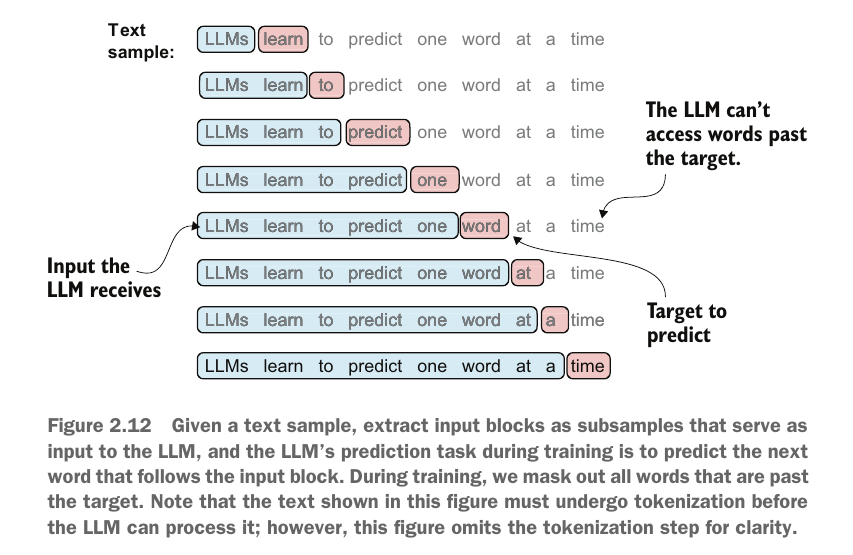
</div>